In [1]:
import sys
sys.path.append('../lib/python/')

import moving_edges

import matplotlib.pyplot as plt
import matplotlib.image as image
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from tabulate import tabulate

plt.rcParams['mathtext.fontset'] = 'cm'

import os
save_filepath = os.getcwd() + "/../figures/"


plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42



In [2]:
stimulus_df = pd.read_csv(r'../tiled_edge_stimuli.csv')

stimulus_df['Shape'] = stimulus_df['Shape'].map(lambda shape: list(map(int, shape.split(',')))) #convert shape to int list
stimulus_df['stimulus code'] = stimulus_df['stimulus code'].map(lambda code: list(map(int, code.strip('[]').split(',')))) #convert stimulus code to int list
stimulus_df.index = range(1, stimulus_df.shape[0] + 1)
stimulus_df['T'] = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]) == 1
stimulus_df['C'] = np.array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]) == 1
stimulus_df['CT'] = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]) == 1
stimulus_df['XT'] = np.array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0]) == 1
stimulus_df['XC'] = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]) == 1
stimulus_df['XCT'] = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]) == 1



def count_net_light_dark(stimulus_code):
    reshaped = np.reshape(stimulus_code, [-1, 2])
    net_light = 0
    net_dark = 0
    for cell in reshaped:
        if cell[0] == 1:
            net_light += cell[1]
        elif cell[0] == -1:
            net_dark += cell[1]
    return (net_light, net_dark)

stimulus_df[['net light', 'net dark']] = [count_net_light_dark(stimulus_df.loc[i, 'stimulus code']) for i in stimulus_df.index]
stimulus_df

,Stimulus type,Shape,stimulus code,net movement,discontinuity fraction,T,C,CT,XT,XC,XCT,net light,net dark
1,"T, net zero 1","[2, 4]","[1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1,...",0,0.0,True,False,False,False,False,False,0,0
2,"T, net zero 2","[2, 4]","[1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, ...",0,0.0,True,False,False,False,False,False,-2,2
3,"C, net zero","[2, 4]","[1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, ...",0,0.0,False,True,False,False,False,False,0,0
4,"C, net motion","[2, 4]","[1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -...",4,0.0,False,True,False,False,False,False,2,2
5,"TC, net zero 1","[2, 4]","[1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, ...",0,0.0,False,False,True,False,False,False,0,0
6,"TC, net zero 2","[2, 4]","[1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1,...",0,0.5,False,False,True,False,False,False,0,0
7,"TX, net zero","[2, 4]","[1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1,...",0,0.0,False,False,False,True,False,False,0,0
8,"TX, net motion","[2, 4]","[1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -...",4,0.0,False,False,False,True,False,False,2,2
9,"CX, net zero 1","[2, 4]","[1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1,...",0,0.0,False,False,False,False,True,False,2,-2
10,"CX, net zero 2","[2, 4]","[1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1,...",0,0.0,False,False,False,False,True,False,2,-2


In [3]:
#Do this for all of the stimuli.
i = 2

def make_flips_xtplots(i):
    plt.rcParams['font.size'] = '16'

    shape = stimulus_df.loc[i, 'Shape']
    if shape == [2, 4]:
        fig = plt.figure(figsize =(2.5, 5.5))
    else:
        fig = plt.figure(figsize =(2, 8))
    ax_dict = fig.subplot_mosaic(
        """
        A
        C
        B
        D
        """,
        sharey = True,
    )

    edge_width = 30
    edge_duration = 0.125



    ax = plt.axes(ax_dict['A'])
    moving_edges.display_stimulus(np.array(stimulus_df.loc[i, 'stimulus code']), shape, '$S_{' + str(i) + '}$', xtess = 1, ttess = 1)
    ax.set_xticks(ticks = np.arange(0, shape[1] + 1, 2), labels = np.repeat('', (shape[1] +2)/2))
    plt.yticks(ticks = np.arange(0, shape[0] + 1, 2), labels = np.arange(0, (shape[0]+1) * edge_duration, edge_duration*2))
    plt.xlabel(None)
    plt.ylabel('Time (s)')
    ax.set_ylim(shape[0], 0)
    ax.set_xlim(0, shape[1])

    ax = plt.axes(ax_dict['B'])
    moving_edges.display_stimulus(moving_edges.transform_stimulus(np.array(stimulus_df.loc[i, 'stimulus code']), shape, 't'), shape, '$_\Theta S_{'+ str(i) + '}$', xtess = 1, ttess = 1)
    plt.ylabel(None)
    plt.xlabel(None)
    ax.set_xticks(ticks = np.arange(0, shape[1] + 1, 2), labels = np.repeat('', (shape[1] +2)/2))
    ax.set_ylim(shape[0], 0)
    ax.set_xlim(0, shape[1])


    ax = plt.axes(ax_dict['C'])
    moving_edges.display_stimulus(moving_edges.transform_stimulus(np.array(stimulus_df.loc[i, 'stimulus code']), shape, 'c'), shape, '$_{\Gamma}S_{'+ str(i) + '}$', xtess = 1, ttess = 1)
    plt.ylabel(None)
    plt.xlabel(None)
    ax.set_xticks(ticks = np.arange(0, shape[1] + 1, 2), labels = np.repeat('', (shape[1] +2)/2))
    ax.set_ylim(shape[0], 0)
    ax.set_xlim(0, shape[1])
    


    ax = plt.axes(ax_dict['D'])
    moving_edges.display_stimulus(moving_edges.transform_stimulus(np.array(stimulus_df.loc[i, 'stimulus code']), shape, 'ct'), shape, '$_{\Gamma\Theta}S_{'+ str(i) + '}$', xtess = 1, ttess = 1)
    plt.ylabel(None)
    ax.set_ylim( shape[0], 0)
    ax.set_xlim(0, shape[1])
    plt.xlabel('Azimuth (°)')
    plt.xticks(ticks = np.arange(0, shape[1] + 1, 2), labels = np.arange(0, (shape[1]+1) * edge_width, edge_width*2))



    fig.tight_layout()

    plt.savefig(save_filepath + 'fig4/xtplots/s' + str(i) + '.pdf', bbox_inches = 'tight')
    plt.savefig(save_filepath + 'fig4/xtplots/s' + str(i) + '.png', bbox_inches = 'tight')


    plt.show()

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


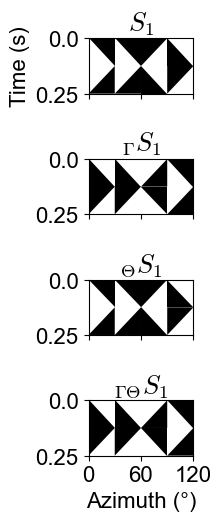

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


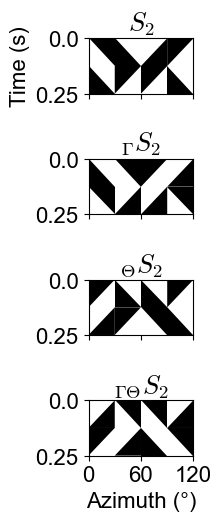

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


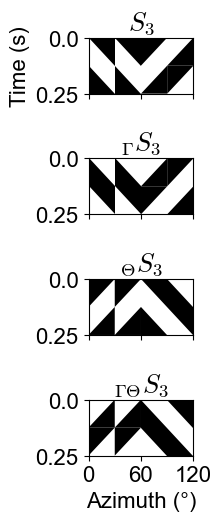

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


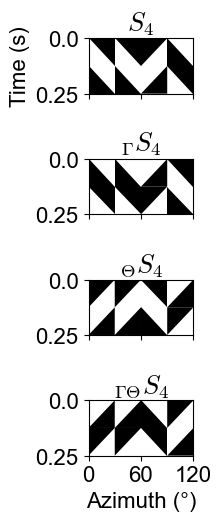

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


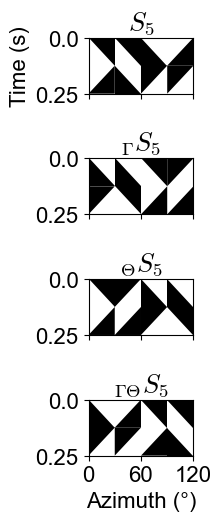

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


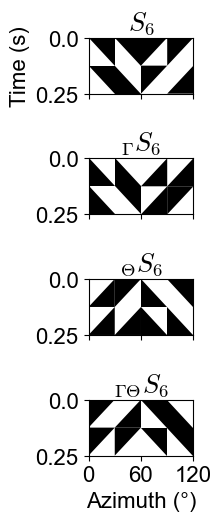

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


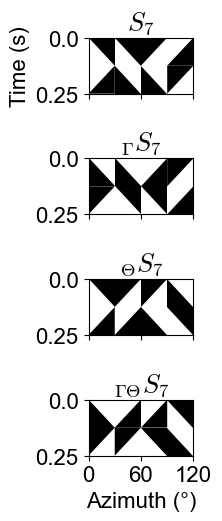

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


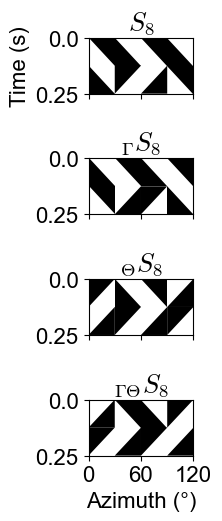

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


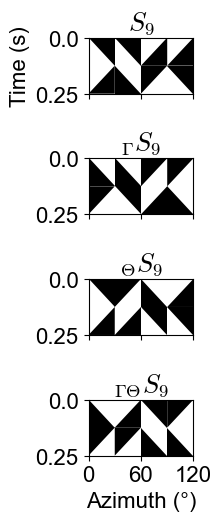

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


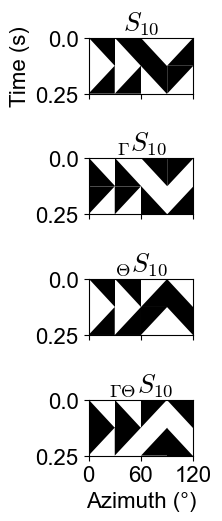

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


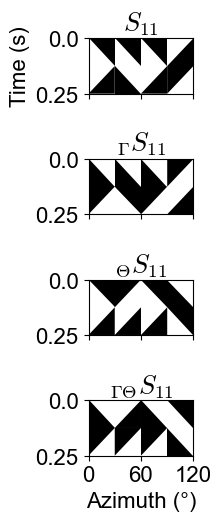

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


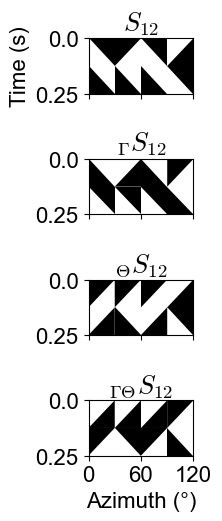

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


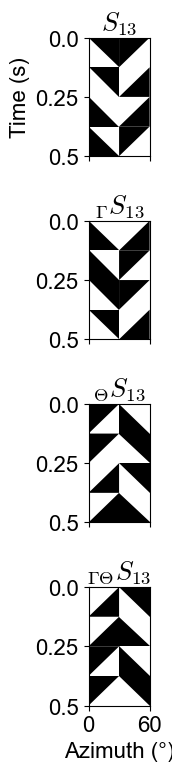

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


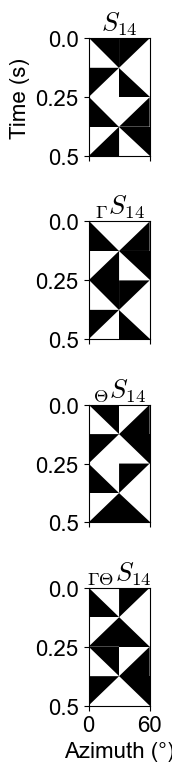

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


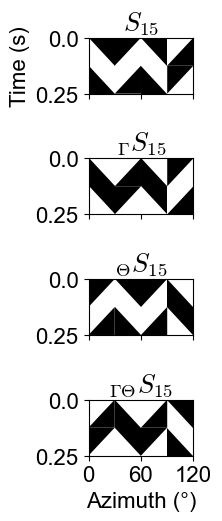

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


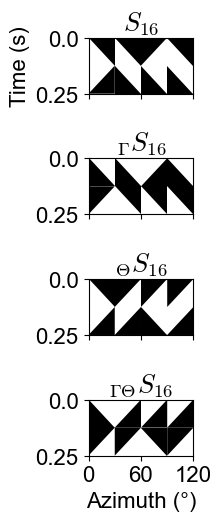

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


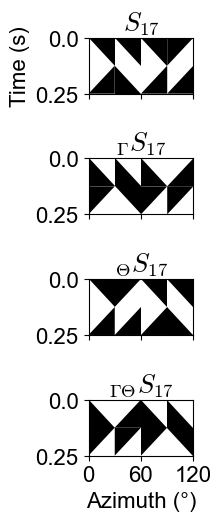

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


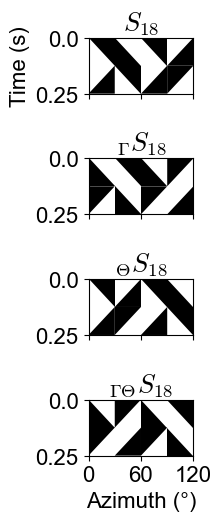

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


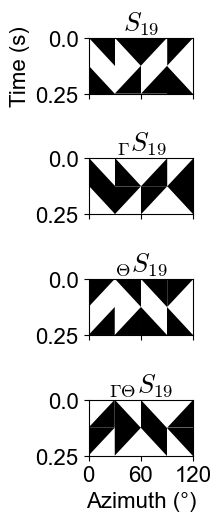

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


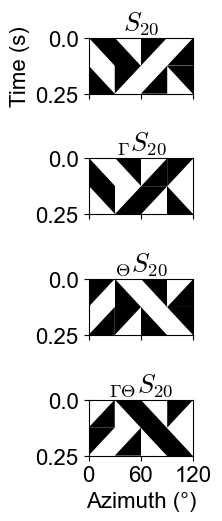

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


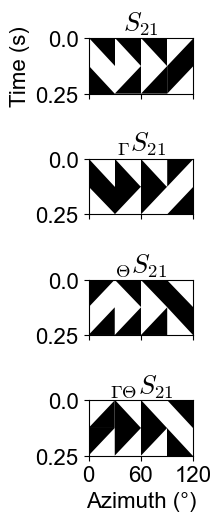

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


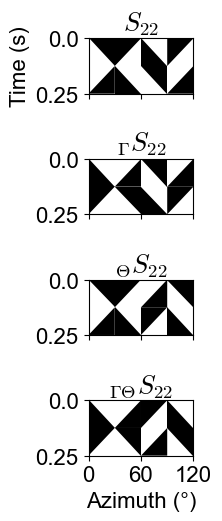

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


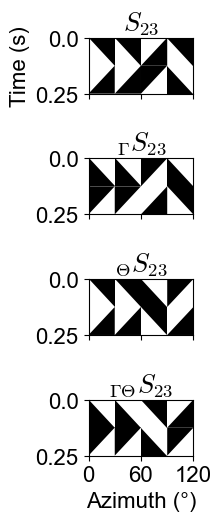

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


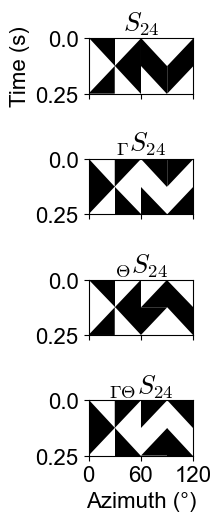

In [5]:
for i in stimulus_df.index:
    make_flips_xtplots(i)